## 0. 환경설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install geopandas
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 시각화 관련
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from PIL import Image
from matplotlib import rc

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

## [221121] 구상권행정동상권파일 전처리
* 구상권코드 + 행정동 + 행정동코드 + 2015~2021

In [2]:
d1 = gpd.read_file('data/서울시_우리마을가게_상권분석서비스(구_상권영역)/TBGIS_TRDAR_RELM.shp',encoding='cp949')
d1 = d1[['TRDAR_CD','ADSTRD_CD']]
d1.columns = ['상권_코드','행정동코드']
d1 = d1.astype('int64')
d1.head(3)
#상권코드 = TRDAR_CD
#ADSTRD_CD

,상권_코드,행정동코드
0,1001453,11620585
1,1001454,11620595
2,1001474,11680650


In [3]:
dfDong = pd.read_excel('data/한국행정구역분류(2022.10.1.기준).xlsx', sheet_name = '행정동 및 법정동코드와의 연계표')
dfDong.rename(columns = dfDong.iloc[0], inplace= True) #첫번째행을 열이름으로
dfDong.drop(dfDong.index[0],inplace=True)#첫번째행삭제
dfDong = dfDong.astype({'행정기관코드':'int64'})
dfDong = dfDong[['시군구','행정동\n(행정기관명)','행정기관코드']]
dfDong['행정기관코드'] = dfDong['행정기관코드']/100
dfDong.columns = ['시군구','행정동','행정동코드']
dfDong.head(3)
#print(dfDong.info())
#행정기관코드/100

,시군구,행정동,행정동코드
1,서울특별시,서울특별시,11000000.0
2,종로구,종로구,11110000.0
3,종로구,청운효자동,11110515.0


In [4]:
#구상권코드의 행정동코드와 행정동
df = pd.merge(d1,dfDong)
df.head()

,상권_코드,행정동코드,시군구,행정동
0,1001453,11620585,관악구,낙성대동
1,1000799,11620585,관악구,낙성대동
2,1000780,11620585,관악구,낙성대동
3,1000781,11620585,관악구,낙성대동
4,1001454,11620595,관악구,청룡동


In [13]:
df_2015 = pd.read_csv('data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2015년.csv',encoding = 'cp949')
df_2016 = pd.read_csv('data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2016년.csv',encoding = 'cp949')
df_2017 = pd.read_csv('data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2017년.csv',encoding = 'cp949')
df_2018 = pd.read_csv('data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2018년.csv',encoding = 'cp949')
df_2019 = pd.read_csv('data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019년.csv',encoding = 'cp949')
df_2020 = pd.read_csv('data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2020년.csv',encoding = 'cp949')
df_2021 = pd.read_csv('data/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2021년.csv',encoding = 'cp949')
#기준_년_코드, 기준_분기_코드,상권_코드,상권_코드_명
#분기당_매출_금액, 분기당_매출_건수,주중_매출_비율,주말_매출_비율 
df_2015 = df_2015[['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명',
                  '분기당_매출_금액','분기당_매출_건수','주중_매출_비율','주말_매출_비율','점포수']]
df_2016 = df_2016[['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명',
                  '분기당_매출_금액','분기당_매출_건수','주중_매출_비율','주말_매출_비율','점포수']]
df_2017 = df_2017[['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명',
                  '분기당_매출_금액','분기당_매출_건수','주중_매출_비율','주말_매출_비율','점포수']]
df_2018 = df_2018[['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명',
                  '분기당_매출_금액','분기당_매출_건수','주중_매출_비율','주말_매출_비율','점포수']]
df_2019 = df_2019[['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명',
                  '분기당_매출_금액','분기당_매출_건수','주중_매출_비율','주말_매출_비율','점포수']]
df_2020 = df_2020[['stdr_yy_cd','stdr_qu_cd','trdar_cd','trdar_cd_nm',
                 'thsmon_selng_amt','thsmon_selng_co','mdwk_selng_rate','wkend_selng_rate','stor_co']]
df_2021 = df_2021[['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명',
                  '분기당_매출_금액','분기당_매출_건수','주중_매출_비율','주말_매출_비율','점포수']]
df_2020.columns = ['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명',
                  '분기당_매출_금액','분기당_매출_건수','주중_매출_비율','주말_매출_비율','점포수']
#df_2021.columns = ['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명',
#                  '분기당_매출_금액','분기당_매출_건수','주중_매출_비율','주말_매출_비율','점포수']

df_2015 = pd.merge(df,df_2015)
df_2016 = pd.merge(df,df_2016)
df_2017 = pd.merge(df,df_2017)
df_2018 = pd.merge(df,df_2018)
df_2019 = pd.merge(df,df_2019)
df_2020 = pd.merge(df,df_2020)
df_2021 = pd.merge(df,df_2021)
#print(df_2016.head(2))
df_2019.head(2)
#null값없음 확인

,상권_코드,행정동코드,시군구,행정동,기준_년_코드,기준_분기_코드,상권_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,점포수
0,1001453,11620585,관악구,낙성대동,2019,1,낙성대시장,159244997,7794,68,32,1
1,1001453,11620585,관악구,낙성대동,2019,1,낙성대시장,96255688,6794,62,38,5


In [9]:
df_2020.head()

,stdr_yy_cd,stdr_qu_cd,trdar_se_cd,trdar_se_cd_nm,trdar_cd,trdar_cd_nm,svc_induty_cd,svc_induty_cd_nm,thsmon_selng_amt,thsmon_selng_co,mdwk_selng_rate,wkend_selng_rate,mon_selng_rate,tues_selng_rate,wed_selng_rate,thur_selng_rate,fri_selng_rate,sat_selng_rate,sun_selng_rate,tmzon_00_06_selng_rate,tmzon_06_11_selng_rate,tmzon_11_14_selng_rate,tmzon_14_17_selng_rate,tmzon_17_21_selng_rate,tmzon_21_24_selng_rate,ml_selng_rate,fml_selng_rate,agrde_10_selng_rate,agrde_20_selng_rate,agrde_30_selng_rate,agrde_40_selng_rate,agrde_50_selng_rate,agrde_60_above_selng_rate,mdwk_selng_amt,wkend_selng_amt,mon_selng_amt,tues_selng_amt,wed_selng_amt,thur_selng_amt,fri_selng_amt,sat_selng_amt,sun_selng_amt,tmzon_00_06_selng_amt,tmzon_06_11_selng_amt,tmzon_11_14_selng_amt,tmzon_14_17_selng_amt,tmzon_17_21_selng_amt,tmzon_21_24_selng_amt,ml_selng_amt,fml_selng_amt,agrde_10_selng_amt,agrde_20_selng_amt,agrde_30_selng_amt,agrde_40_selng_amt,agrde_50_selng_amt,agrde_60_above_selng_amt,mdwk_selng_co,wkend_selng_co,mon_selng_co,tues_selng_co,wed_selng_co,thur_selng_co,fri_selng_co,sat_selng_co,sun_selng_co,tmzon_00_06_selng_co,tmzon_06_11_selng_co,tmzon_11_14_selng_co,tmzon_14_17_selng_co,tmzon_17_21_selng_co,tmzon_21_24_selng_co,ml_selng_co,fml_selng_co,agrde_10_selng_co,agrde_20_selng_co,agrde_30_selng_co,agrde_40_selng_co,agrde_50_selng_co,agrde_60_above_selng_co,stor_co
0,2020,1,A,골목상권,1000001,계동길,CS100001,한식음식점,431442455,18548,79,21,13,15,16,17,18,11,10,0,2,47,13,36,2,49,51,2,31,31,16,13,7,347666954,83775501,57836408,62676591,76100528,74583641,76469786,44469818,39305683,0,2948631,199264316,50651452,152694784,25883272,191019483,152066866,2544277,69650930,91286746,72418118,65658966,41527310,15115,3433,2750,2882,3268,3057,3158,1795,1638,0,639,9704,3342,4518,345,8752,7776,611,3828,4356,3428,2614,1690,19
1,2020,1,A,골목상권,1000001,계동길,CS100002,중식음식점,25767161,1413,78,22,12,17,19,15,15,9,14,0,0,54,18,28,0,47,53,12,29,19,28,7,6,19300912,6466249,3122759,4094989,5150660,3326962,3605542,2475494,3990755,0,0,14401640,4027810,7337711,0,10101382,12469443,1485670,7127377,4988043,5928017,1514728,1526990,1099,314,176,225,262,213,223,122,192,0,0,763,251,399,0,592,694,145,368,240,368,96,69,1
2,2020,1,A,골목상권,1000001,계동길,CS100003,일식음식점,55484866,1272,83,17,14,19,16,18,17,17,0,0,0,47,11,23,19,55,45,0,12,22,24,28,14,46837834,8647032,6794759,10280121,9847923,9122449,10792582,8647032,0,0,0,18210940,4118222,14049497,19106207,27143276,19725428,0,4898312,10530729,11958404,14016411,5464850,1055,217,173,233,211,222,216,217,0,0,0,599,142,290,241,622,508,0,134,245,275,314,162,3
3,2020,1,A,골목상권,1000001,계동길,CS100004,양식음식점,156728306,3589,42,58,6,8,8,9,11,44,15,0,1,22,38,39,1,31,69,0,36,42,11,7,4,94275028,62453278,11213200,18582308,17284154,19631475,27563891,31432604,31020674,0,106600,40043304,37869347,77430577,1278478,58274895,75726743,96341,49458665,39186870,17522937,20924446,6812377,2079,1510,283,419,393,427,557,839,671,0,4,966,814,1772,33,1281,2014,5,1361,1116,331,325,157,3
4,2020,1,A,골목상권,1000001,계동길,CS100005,제과점,257814129,27092,76,24,16,14,16,15,16,13,11,0,23,28,21,24,4,41,59,1,17,28,25,17,12,196677600,61136529,39552546,34464171,39379129,40109285,43172469,33105173,28031356,0,50954488,76352000,59502108,61146841,9858692,87979182,130926668,1278313,31208244,57967267,53832207,42742868,31876953,20669,6423,4204,3753,4194,4185,4333,3485,2938,0,6283,7488,5590,6526,1205,10426,14742,234,4316,7089,6188,4351,2989,4


In [17]:
df_2015_2021 = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021])

df_2015_2021['행정동'] = df_2015_2021['행정동'].str.replace('.','·')
df_2015_2021['기준_년_코드'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [19]:
df_2015_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2268935 entries, 0 to 273805
Data columns (total 12 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   상권_코드      int64 
 1   행정동코드      int64 
 2   시군구        object
 3   행정동        object
 4   기준_년_코드    int64 
 5   기준_분기_코드   int64 
 6   상권_코드_명    object
 7   분기당_매출_금액  int64 
 8   분기당_매출_건수  int64 
 9   주중_매출_비율   int64 
 10  주말_매출_비율   int64 
 11  점포수        int64 
dtypes: int64(9), object(3)
memory usage: 225.0+ MB


In [18]:
df_2015_2021.to_csv('2015-2021구상권추정매출.csv')

In [13]:
df_2015.to_csv('2015구상권추정매출_동.csv')
df_2016.to_csv('2016구상권추정매출_동.csv')
df_2017.to_csv('2017구상권추정매출_동.csv')
df_2018.to_csv('2018구상권추정매출_동.csv')
df_2019.to_csv('2019구상권추정매출_동.csv')
df_2020.to_csv('2018구상권추정매출_동.csv')
df_2021.to_csv('2019구상권추정매출_동.csv')


In [11]:
df_2021.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,1000001,계동길,CS100001,한식음식점,316763168,13820,76,24,18,13,15,15,15,13,10,0,2,45,13,38,3,45,32,1,15,20,18,15,9,242037775,74725393,57136142,41033472,48781382,47969401,47117378,42400357,32325036,0,5200057,141621164,39987184,119617655,10337108,142816088,102606323,2135084,48675387,61681122,56897678,46180705,29852436,11187,2633,2467,1992,2406,2145,2177,1557,1076,0,898,6980,2767,2971,204,6283,4828,402,2286,2963,2673,1717,1068,16
1,2021,1,A,골목상권,1000001,계동길,CS100002,중식음식점,39791852,2042,68,32,14,12,16,14,12,14,18,0,0,42,22,35,1,39,49,10,33,15,13,12,5,27230971,12560881,5724081,4869946,6256182,5707553,4673209,5574527,6986354,0,0,16815021,8618644,14026557,331630,15320434,19456450,3803768,13012511,6053933,5280040,4671822,1954809,1450,592,303,251,374,282,240,277,315,0,0,900,438,693,11,825,1041,243,629,307,322,269,97,1
2,2021,1,A,골목상권,1000001,계동길,CS100003,일식음식점,60325474,1563,84,16,14,16,27,9,18,16,0,0,0,39,6,30,25,30,36,0,8,19,16,16,7,50844919,9480555,8363017,9597866,16389537,5667958,10826541,9480555,0,0,0,23425090,3463752,18359122,15077510,17899140,21807439,0,4945571,11573625,9604040,9520688,4062653,1396,167,266,290,402,166,272,167,0,0,0,933,136,358,136,519,635,0,185,339,242,279,112,2
3,2021,1,A,골목상권,1000001,계동길,CS100004,양식음식점,199448496,4442,54,46,8,10,12,10,14,25,21,0,0,31,19,48,2,40,43,0,28,25,9,15,6,107935451,91513045,16261937,20220422,23670669,20735461,27046962,49828030,41685015,0,0,62577748,38029880,94762211,4078657,79945162,85649352,682175,55225642,49380427,18079254,29516708,12710309,2427,2015,370,498,519,466,574,1129,886,0,0,1413,881,2082,66,1778,2175,31,1505,1155,439,566,256,3
4,2021,1,A,골목상권,1000001,계동길,CS100005,제과점,165688274,18512,76,24,14,16,18,14,14,13,12,0,24,28,18,27,4,37,45,1,11,19,18,16,17,125817232,39871042,23646093,26415916,28922188,22966291,23866744,20898892,18972150,0,39177374,45781959,29726354,44862354,6140233,60546425,73700130,1175614,17667578,31323681,29874639,26707544,27497498,14265,4247,2921,2826,3293,2487,2738,2141,2106,0,5043,4515,3320,4958,676,7523,9187,208,2471,4577,3857,2990,2609,4


### [221122] 차없거행정동전체데이터 상권검색 전후비교

In [73]:
df=pd.read_csv('2015-2021구상권추정매출.csv')
df.head()
df['상권_코드_명'].unique()

array(['낙성대시장', '남부순환로234길', '관악로10길', ..., '푸른터시장', '동부청과시장', '자양종합시장'],
      dtype=object)

In [74]:
df_all = df[(df['기준_분기_코드']==4)&
        ((df['기준_년_코드']==2015)|(df['기준_년_코드']==2016))]
df_all= df_all.groupby('기준_년_코드',as_index=False).mean()
df_all['행정동'] = '상권전체'
df_all

,기준_년_코드,Unnamed: 0,상권_코드,행정동코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,점포수,행정동
0,2015,177826.449765,1.000844e+06,1.132994e+07,4.0,9.216012e+08,32121.377293,79.363249,20.732027,15.617334,상권전체
1,2016,180144.896323,1.000843e+06,1.133177e+07,4.0,8.915788e+08,32715.870205,78.021941,22.065239,15.544725,상권전체


In [76]:
df_솔샘 = df[(df['상권_코드_명']=='솔샘시장') 
        &(df['기준_분기_코드']==4)&
        ((df['기준_년_코드']==2015)|(df['기준_년_코드']==2016))]
df_솔샘= df_솔샘.groupby('기준_년_코드',as_index=False).mean()
df_솔샘['행정동'] = '솔샘로50길 4(솔샘시장)'
df_솔샘

,기준_년_코드,Unnamed: 0,상권_코드,행정동코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,점포수,행정동
0,2015,250590.0,1001351.0,11305575.0,4.0,1.860552e+08,7311.548387,73.806452,26.258065,3.354839,솔샘로50길 4(솔샘시장)
1,2016,253023.5,1001351.0,11305575.0,4.0,1.690564e+08,6441.529412,72.529412,27.529412,3.088235,솔샘로50길 4(솔샘시장)


In [77]:
c = pd.concat([df_all,df_솔샘])
c

,기준_년_코드,Unnamed: 0,상권_코드,행정동코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,점포수,행정동
0,2015,177826.449765,1.000844e+06,1.132994e+07,4.0,9.216012e+08,32121.377293,79.363249,20.732027,15.617334,상권전체
1,2016,180144.896323,1.000843e+06,1.133177e+07,4.0,8.915788e+08,32715.870205,78.021941,22.065239,15.544725,상권전체
0,2015,250590.000000,1.001351e+06,1.130558e+07,4.0,1.860552e+08,7311.548387,73.806452,26.258065,3.354839,솔샘로50길 4(솔샘시장)
1,2016,253023.500000,1.001351e+06,1.130558e+07,4.0,1.690564e+08,6441.529412,72.529412,27.529412,3.088235,솔샘로50길 4(솔샘시장)


In [78]:
c.to_csv('솔샘로50길 4(솔샘시장)_전후.csv')

In [72]:
c = c.groupby('기준_년_코드',as_index=False).mean()
#c['행정동'] = '솔샘로50길 4'#솔샘시장
c = c.groupby('기준_년_코드',as_index=False).mean()
#c['행정동'] = '상권전체'

NameError: name 'c_all' is not defined

In [65]:
#신길로42가길, 새말로18길, 솔샘시장
#검색 = df[df['상권_코드_명']=='솔샘시장']#20160801
#검색 = df[df['상권_코드_명']=='관악로14길']#20140901
#검색 = df[df['상권_코드_명']=='관악로30길']#20080922
#검색 = df[df['상권_코드_명']=='천호옛길']#결측치
#검색 = df[df['상권_코드_명']=='솔샘시장']

In [ ]:
a_all = df_2015[(df_2015['기준_분기_코드']==4)]
b_all = df_2016[(df_2016['기준_분기_코드']==4)]
c_all = pd.concat([a_all,b_all])
a = df_2015[(df_2015['상권_코드_명']=='솔샘시장')]#& (df_2015['기준_분기_코드']==4)]
b = df_2016[(df_2016['상권_코드_명']=='솔샘시장')]#& (df_2016['기준_분기_코드']==4)]
c = pd.concat([a,b])

### [221122] 지표별 상권 전후
* 여의동, 서교동

In [2]:
df=pd.read_csv('2015-2021구상권추정매출.csv')
df.head(2)


,Unnamed: 0,상권_코드,행정동코드,시군구,행정동,기준_년_코드,기준_분기_코드,상권_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,점포수
0,0,1001453,11620585,관악구,낙성대동,2015,1,낙성대시장,830174081,84353,67,33,3
1,1,1001453,11620585,관악구,낙성대동,2015,1,낙성대시장,27661268,1683,59,41,1


In [10]:
#종로1.2.3.4가동 시기데이터 없음
#신정3동 20160801, 15 16 4분기
#한강로동 20160924, 15164분기
학교_신정3동 = df[(df['행정동']=='신정3동')
        &((df['기준_년_코드']==2015)|(df['기준_년_코드']==2016))
        &((df['기준_분기_코드']==4))]
학교_전체 = df[((df['행정동']=='신촌동')
        |(df['행정동']=='장지동')
        |(df['행정동']=='양재1동')
        |(df['행정동']=='목5동')
        |(df['행정동']=='망우본동')
        |(df['행정동']=='공릉2동')
        |(df['행정동']=='강일동')
        |(df['행정동']=='진관동')
        |(df['행정동']=='광장동'))
        &((df['기준_년_코드']==2015)|(df['기준_년_코드']==2016))
        &((df['기준_분기_코드']==4))]
학교_신정3동=학교_신정3동.groupby('기준_년_코드',as_index=False).mean()
학교_신정3동['행정동']='신정3동'
학교_전체=학교_전체.groupby('기준_년_코드',as_index=False).mean()
학교_전체['행정동']='상권전체'
학교_신정3동=pd.concat([학교_신정3동,학교_전체])

In [11]:
학교_신정3동.to_csv('학교_신정3동_전후.csv')

In [14]:
주거_신정3동 = df[(df['행정동']=='신정3동')
        &((df['기준_년_코드']==2015)|(df['기준_년_코드']==2016))
        &((df['기준_분기_코드']==4))]
주거_전체 = df[((df['행정동']=='역삼1동')
        |(df['행정동']=='양재1동')
        |(df['행정동']=='독산제1동')
        |(df['행정동']=='상도제1동')
        |(df['행정동']=='화곡제1동')
        |(df['행정동']=='오류제2동')
        |(df['행정동']=='길동')
        |(df['행정동']=='진관동')
        |(df['행정동']=='역촌동'))
        &((df['기준_년_코드']==2015)|(df['기준_년_코드']==2016))
        &((df['기준_분기_코드']==4))]
#주거_전체['행정동'].unique()
주거_신정3동=주거_신정3동.groupby('기준_년_코드',as_index=False).mean()
주거_신정3동['행정동']='신정3동'
주거_전체=주거_전체.groupby('기준_년_코드',as_index=False).mean()
주거_전체['행정동']='상권전체'
주거_신정3동=pd.concat([주거_신정3동,주거_전체])
주거_신정3동.to_csv('주거_신정3동_전후.csv')

In [17]:
상업_한강로동 = df[(df['행정동']=='한강로동')
        &((df['기준_년_코드']==2015)|(df['기준_년_코드']==2016))
        &((df['기준_분기_코드']==4))]
상업_전체 = df[((df['행정동']=='역삼1동')
        |(df['행정동']=='여의동')
        |(df['행정동']=='가락1동')
        |(df['행정동']=='반포4동')
        |(df['행정동']=='신촌동')
        |(df['행정동']=='명동')
        |(df['행정동']=='광희동')
        |(df['행정동']=='서교동'))
        &((df['기준_년_코드']==2015)|(df['기준_년_코드']==2016))
        &((df['기준_분기_코드']==4))]
#상업_전체['행정동'].unique()
상업_한강로동=상업_한강로동.groupby('기준_년_코드',as_index=False).mean()
상업_한강로동['행정동']='한강로동'
상업_전체=상업_전체.groupby('기준_년_코드',as_index=False).mean()
상업_전체['행정동']='상권전체'
상업_한강로동=pd.concat([상업_한강로동,상업_전체])
상업_한강로동.to_csv('상업_한강로동_전후.csv')

# [221031] 상업전후비교

## 2. 상업전후 비교
* 행정동단위

### 2-1. 신길로 37길, 가마산로69가길
* 16 & 17 3분기 신길제3동

In [27]:
a_all = df_2016[(df_2016['기준_분기_코드']==3)]
b_all = df_2017[(df_2017['기준_분기_코드']==3)]
c_all = pd.concat([a_all,b_all])
a = df_2016[(df_2016['행정동']=='신길제3동')& (df_2016['기준_분기_코드']==3)]
b = df_2017[(df_2017['행정동']=='신길제3동')& (df_2017['기준_분기_코드']==3)]
c = pd.concat([a,b])
print(c['기준_년_코드'].unique())
print(c['기준_분기_코드'].unique())
print(c['행정동'].unique())
print(c['상권_코드_명'].unique())
print(c.info())

[2016 2017]
[3]
['신길제3동']
['신길로39길' '가마산로61길' '사러가시장']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 265437 to 264124
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   상권_코드      124 non-null    int64 
 1   행정동코드      124 non-null    int64 
 2   시군구        124 non-null    object
 3   행정동        124 non-null    object
 4   기준_년_코드    124 non-null    int64 
 5   기준_분기_코드   124 non-null    int64 
 6   상권_코드_명    124 non-null    object
 7   분기당_매출_금액  124 non-null    int64 
 8   분기당_매출_건수  124 non-null    int64 
 9   주중_매출_비율   124 non-null    int64 
 10  주말_매출_비율   124 non-null    int64 
 11  점포수        124 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 12.6+ KB
None


In [29]:
c = c.groupby('기준_년_코드',as_index=False).mean()
c['행정동'] = '신길제3동'
c_all = c_all.groupby('기준_년_코드',as_index=False).mean()
c_all['행정동'] = '전체'
c_final = pd.concat([c,c_all])
c_final

#c = c.astype({'기준_년_코드':'string'})

,기준_년_코드,상권_코드,행정동코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,점포수,행정동
0,2016,1.000933e+06,1.156065e+07,3.0,1.126188e+08,4385.370968,73.048387,27.016129,2.951613,신길제3동
1,2017,1.000932e+06,1.156065e+07,3.0,1.187768e+08,4565.370968,71.435484,28.645161,2.822581,신길제3동
0,2016,1.000844e+06,1.133064e+07,3.0,8.249754e+08,32292.428540,79.351139,20.741045,15.590816,전체
1,2017,1.000845e+06,1.133110e+07,3.0,8.942943e+08,35452.855591,78.179683,21.909253,15.646539,전체


In [30]:
c_final.to_csv('차없길2개_신길제3동전후.csv')

Text(0.5, 1.0, '신길로 37길, 가마산로69가길_행정동단위_분기당_매출_금액')

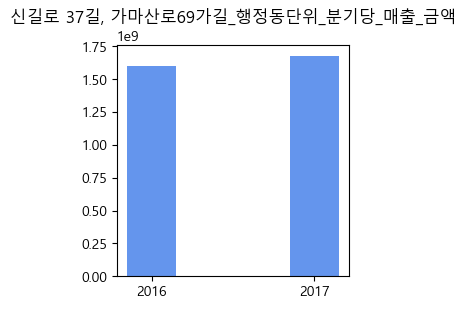

In [96]:
plt.figure(figsize=(3, 3))
plt.bar(c["기준_년_코드"],c["분기당_매출_금액"], color='cornflowerblue',width = 0.3)
#plt.plot(a["항목"],a["관광"], color='mediumpurple')
plt.xticks(rotation=0)
#plt.grid(True)
plt.title("신길로 37길, 가마산로69가길_행정동단위_분기당_매출_금액")

### 2-2. 중앙시장
* 16 & 17 4분기 황학동

In [22]:
a_all = df_2016[(df_2016['기준_분기_코드']==4)]
b_all = df_2017[(df_2017['기준_분기_코드']==4)]
c_all = pd.concat([a_all,b_all])
a = df_2016[(df_2016['행정동']=='황학동')& (df_2016['기준_분기_코드']==4)]
b = df_2017[(df_2017['행정동']=='황학동')& (df_2017['기준_분기_코드']==4)]
c = pd.concat([a,b])
print(c['기준_년_코드'].unique())
print(c['기준_분기_코드'].unique())
print(c['행정동'].unique())
print(c['상권_코드_명'].unique())
print(c.info())

[2016 2017]
[4]
['황학동']
['난계로11길' '난계로21길' '서울중앙시장']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 285218 to 283974
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   상권_코드      126 non-null    int64 
 1   행정동코드      126 non-null    int64 
 2   시군구        126 non-null    object
 3   행정동        126 non-null    object
 4   기준_년_코드    126 non-null    int64 
 5   기준_분기_코드   126 non-null    int64 
 6   상권_코드_명    126 non-null    object
 7   분기당_매출_금액  126 non-null    int64 
 8   분기당_매출_건수  126 non-null    int64 
 9   주중_매출_비율   126 non-null    int64 
 10  주말_매출_비율   126 non-null    int64 
 11  점포수        126 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 12.8+ KB
None


In [31]:
c = c.groupby('기준_년_코드',as_index=False).mean()
c['행정동'] = '황학동'
c_all = c_all.groupby('기준_년_코드',as_index=False).mean()
c_all['행정동'] = '전체'
c_final = pd.concat([c,c_all])
c_final

,기준_년_코드,상권_코드,행정동코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,점포수,행정동
0,2016,1.000933e+06,1.156065e+07,3.0,1.126188e+08,4385.370968,73.048387,27.016129,2.951613,황학동
1,2017,1.000932e+06,1.156065e+07,3.0,1.187768e+08,4565.370968,71.435484,28.645161,2.822581,황학동
0,2016,1.000844e+06,1.133064e+07,3.0,8.249754e+08,32292.428540,79.351139,20.741045,15.590816,전체
1,2017,1.000845e+06,1.133110e+07,3.0,8.942943e+08,35452.855591,78.179683,21.909253,15.646539,전체


In [32]:
c_final.to_csv('차없길1개_황학동전후.csv')

## 3. 길단위 -> 전부 실시 이후 증가
* 신길로42가길
* 종로58길 -> 종로58가길
* 새말로18길

### 3-1. **신길로42가길**

In [33]:
a_all = df_2016[(df_2016['기준_분기_코드']==4)]
b_all = df_2017[(df_2017['기준_분기_코드']==4)]
c_all = pd.concat([a_all,b_all])
a = df_2016[(df_2016['상권_코드_명']=='신길로42가길')& (df_2016['기준_분기_코드']==4)]
b = df_2017[(df_2017['상권_코드_명']=='신길로42가길')& (df_2017['기준_분기_코드']==4)]
c = pd.concat([a,b])
print(c['기준_년_코드'].unique())
print(c['기준_분기_코드'].unique())
print(c['행정동'].unique())
print(c['상권_코드_명'].unique())
print(c.info())

[2016 2017]
[4]
['신길제1동']
['신길로42가길']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 185213 to 184243
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   상권_코드      17 non-null     int64 
 1   행정동코드      17 non-null     int64 
 2   시군구        17 non-null     object
 3   행정동        17 non-null     object
 4   기준_년_코드    17 non-null     int64 
 5   기준_분기_코드   17 non-null     int64 
 6   상권_코드_명    17 non-null     object
 7   분기당_매출_금액  17 non-null     int64 
 8   분기당_매출_건수  17 non-null     int64 
 9   주중_매출_비율   17 non-null     int64 
 10  주말_매출_비율   17 non-null     int64 
 11  점포수        17 non-null     int64 
dtypes: int64(9), object(3)
memory usage: 1.7+ KB
None


In [34]:
c = c.groupby('기준_년_코드',as_index=False).mean()
c['행정동'] = '신길로42가길'
c_all = c_all.groupby('기준_년_코드',as_index=False).mean()
c_all['행정동'] = '상권전체'
c_final = pd.concat([c,c_all])
c_final

,기준_년_코드,상권_코드,행정동코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,점포수,행정동
0,2016,1.000716e+06,1.156063e+07,4.0,8.599459e+07,8456.000000,54.555556,45.555556,2.888889,신길로42가길
1,2017,1.000716e+06,1.156063e+07,4.0,8.992302e+07,10283.375000,55.750000,44.250000,3.125000,신길로42가길
0,2016,1.000843e+06,1.133177e+07,4.0,8.915788e+08,32715.870205,78.021941,22.065239,15.544725,상권전체
1,2017,1.000846e+06,1.133079e+07,4.0,9.043757e+08,32851.128575,77.904020,22.185036,15.671693,상권전체


In [35]:
c_final.to_csv('신길로42가길_전후.csv')

### 3-2. **종로58가길**
* 주말이랑 공휴일만 실시했는데, 주말매출비율 증가!
* 전일제로 실시한 지역과 비교했을 때 주말매출 훨씬증가해서 완전 좋은증거!

In [15]:
a = df_2015[(df_2015['상권_코드_명']=='종로58가길')& (df_2015['기준_분기_코드']==4)]
b = df_2016[(df_2016['상권_코드_명']=='종로58가길')& (df_2016['기준_분기_코드']==4)]
c = pd.concat([a,b])
print(c['기준_년_코드'].unique())
print(c['기준_분기_코드'].unique())
print(c['행정동'].unique())
print(c['상권_코드_명'].unique())
print(c.info())

[2015 2016]
[4]
['숭인제2동']
['종로58가길']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 232964 to 235203
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   상권_코드      49 non-null     int64 
 1   행정동코드      49 non-null     int64 
 2   행정동        49 non-null     object
 3   기준_년_코드    49 non-null     int64 
 4   기준_분기_코드   49 non-null     int64 
 5   상권_코드_명    49 non-null     object
 6   분기당_매출_금액  49 non-null     int64 
 7   분기당_매출_건수  49 non-null     int64 
 8   주중_매출_비율   49 non-null     int64 
 9   주말_매출_비율   49 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 4.2+ KB
None


In [16]:
c.groupby('기준_년_코드',as_index=False).mean()

,기준_년_코드,상권_코드,행정동코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율
0,2015,1000018.0,11110710.0,4.0,2.278248e+08,14561.800000,77.160000,22.920000
1,2016,1000018.0,11110710.0,4.0,2.332730e+08,16762.458333,72.541667,27.583333


In [17]:
c.groupby('기준_년_코드',as_index=False).mean().to_csv('종로58가길_상업전후.csv')

### 3-3. **새말로18길**

In [36]:
a_all = df_2016[(df_2016['기준_분기_코드']==4)]
b_all = df_2017[(df_2017['기준_분기_코드']==4)]
c_all = pd.concat([a_all,b_all])
a = df_2016[(df_2016['상권_코드_명']=='새말로18길')& (df_2016['기준_분기_코드']==4)]
b = df_2017[(df_2017['상권_코드_명']=='새말로18길')& (df_2017['기준_분기_코드']==4)]
c = pd.concat([a,b])
print(c['기준_년_코드'].unique())
print(c['기준_분기_코드'].unique())
print(c['행정동'].unique())
print(c['상권_코드_명'].unique())
print(c.info())

[2016 2017]
[4]
['구로제5동']
['새말로18길']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 153407 to 152477
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   상권_코드      42 non-null     int64 
 1   행정동코드      42 non-null     int64 
 2   시군구        42 non-null     object
 3   행정동        42 non-null     object
 4   기준_년_코드    42 non-null     int64 
 5   기준_분기_코드   42 non-null     int64 
 6   상권_코드_명    42 non-null     object
 7   분기당_매출_금액  42 non-null     int64 
 8   분기당_매출_건수  42 non-null     int64 
 9   주중_매출_비율   42 non-null     int64 
 10  주말_매출_비율   42 non-null     int64 
 11  점포수        42 non-null     int64 
dtypes: int64(9), object(3)
memory usage: 4.3+ KB
None


In [37]:
c = c.groupby('기준_년_코드',as_index=False).mean()
c['행정동'] = '새말로18길'
c_all = c_all.groupby('기준_년_코드',as_index=False).mean()
c_all['행정동'] = '상권전체'
c_final = pd.concat([c,c_all])
c_final

,기준_년_코드,상권_코드,행정동코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,점포수,행정동
0,2016,1.000648e+06,1.153056e+07,4.0,3.012239e+08,9801.636364,73.818182,26.272727,5.181818,새말로18길
1,2017,1.000648e+06,1.153056e+07,4.0,3.843541e+08,11396.150000,72.450000,27.700000,5.700000,새말로18길
0,2016,1.000843e+06,1.133177e+07,4.0,8.915788e+08,32715.870205,78.021941,22.065239,15.544725,상권전체
1,2017,1.000846e+06,1.133079e+07,4.0,9.043757e+08,32851.128575,77.904020,22.185036,15.671693,상권전체


In [ ]:
c_final.to_csv('새말로18길_전후.csv')

## 3. 비고

### 2-3. 신길로 42가길
* 16 & 17 4분기 영등포본동

In [76]:
a = df_2016[(df_2016['행정동']=='영등포본동')& (df_2016['기준_분기_코드']==4)]
b = df_2017[(df_2017['행정동']=='영등포본동')& (df_2017['기준_분기_코드']==4)]
c = pd.concat([a,b])
print(c['기준_년_코드'].unique())
print(c['기준_분기_코드'].unique())
print(c['행정동'].unique())
print(c['상권_코드_명'].unique())
print(c.info())

[2016 2017]
[4]
['영등포본동']
['신길로60길' '영신로9길' '영등포로62길']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 201478 to 200920
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   상권_코드      244 non-null    int64 
 1   행정동코드      244 non-null    int64 
 2   행정동        244 non-null    object
 3   기준_년_코드    244 non-null    int64 
 4   기준_분기_코드   244 non-null    int64 
 5   상권_코드_명    244 non-null    object
 6   분기당_매출_금액  244 non-null    int64 
 7   분기당_매출_건수  244 non-null    int64 
 8   주중_매출_비율   244 non-null    int64 
 9   주말_매출_비율   244 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 21.0+ KB
None


In [77]:
c.groupby('기준_년_코드',as_index=False).mean()

,기준_년_코드,상권_코드,행정동코드,기준_분기_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율
0,2016,1.000726e+06,11560515.0,4.0,1.598538e+08,8763.412698,73.269841,26.841270
1,2017,1.000726e+06,11560515.0,4.0,1.732762e+08,10147.881356,70.711864,29.338983
